# Ensemble modeling for flu challenge

In [ ]:
import torch
import pandas as pd
from collections import defaultdict
from typing import Dict, List, Callable

import pyciemss
import pyciemss.visuals.plots as plots
import pyciemss.visuals.vega as vega
import pyciemss.visuals.trajectories as trajectories

### Collect models and data

In [2]:
fl_models = ["seirh_Florida.json", "fl_age_model.json", "fl_seirhd.json"]
fl_data = "data_fl.csv"

pa_models = ["seirh_Pennsylvania.json", "pa_age_model.json", "pa_seirhd.json"]
pa_data = "data_pa.csv"

### Set parameters for sampling. 

Note that the time unit is weeks.

In [3]:
start_time = 0.0 # October 14, 2024
end_data = 8.0 # December 9, 2023
end_time = 12.0 # forecast to January 6, 2024
logging_step_size = 1.0
num_samples = 100

# FLORIDA

## Calibrate each model independently

### Age-structured model

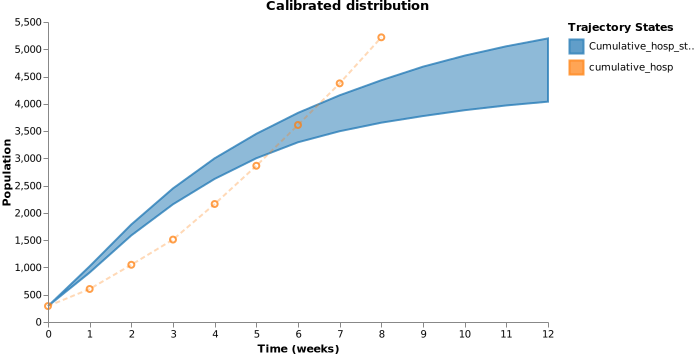

In [ ]:
model = fl_models[1]
dataset = pd.read_csv(fl_data).drop(columns=['Timestamp']).reset_index(drop=True)
data_mapping = {"cumulative_hosp": "cumulative_hosp"}

num_iterations = 100
calibrated_results = pyciemss.calibrate(
    model, 
    fl_data, 
    data_mapping=data_mapping, 
    num_iterations=num_iterations
)
parameter_estimates = calibrated_results["inferred_parameters"]
# print(parameter_estimates())

calibrated_sample_results = pyciemss.sample(
    model, 
    end_time, 
    logging_step_size, 
    num_samples,             
    start_time=start_time, 
    inferred_parameters=parameter_estimates
)
# display(calibrated_sample_results["data"].head())

# Plot the result
schema = plots.trajectories(calibrated_sample_results["data"], keep="Cumulative_hosp_state", points=dataset.reset_index(drop=True), title=[f"Calibrated distribution"], axis_labels={"xaxis_label": "Time (weeks)", "yaxis_label": "Population"})
plots.save_schema(schema, "_schema.svg")
plots.ipy_display(schema, format='svg') 

### SEIRHD model

Data printout: This dataset contains 8 rows of data. The first column, Timestamp, begins at 0.0 and ends at 8.0. The subsequent columns are named: cumulative_hosp


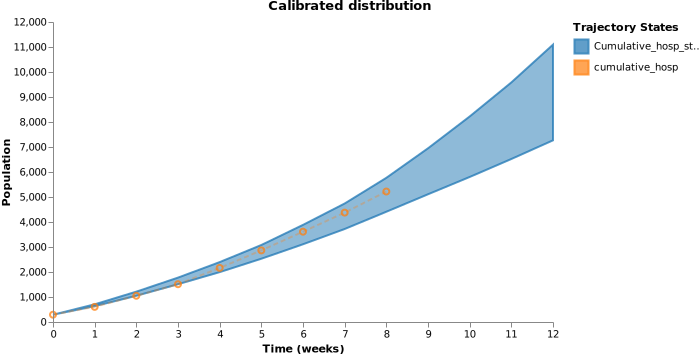

In [14]:
model = fl_models[2]
dataset = pd.read_csv(fl_data).drop(columns=['Timestamp']).reset_index(drop=True)
data_mapping = {"cumulative_hosp": "Cumulative_hosp"}

num_iterations = 100
calibrated_results = pyciemss.calibrate(
    model, 
    fl_data, 
    data_mapping=data_mapping, 
    num_iterations=num_iterations
)
parameter_estimates = calibrated_results["inferred_parameters"]
# print(parameter_estimates())

calibrated_sample_results = pyciemss.sample(
    model, 
    end_time, 
    logging_step_size, 
    num_samples,             
    start_time=start_time, 
    inferred_parameters=parameter_estimates
)
# display(calibrated_sample_results["data"].head())

# Plot the result
schema = plots.trajectories(calibrated_sample_results["data"], keep="Cumulative_hosp_state", points=dataset.reset_index(drop=True), title=[f"Calibrated distribution"], axis_labels={"xaxis_label": "Time (weeks)", "yaxis_label": "Population"})
plots.save_schema(schema, "_schema.svg")
plots.ipy_display(schema, format='svg') 

## Ensemble

### Set up callable solution mappings

In [ ]:
def create_solution_mapping(mapping: Dict[str, str]) -> Callable[[Dict[str, torch.Tensor]], Dict[str, torch.Tensor]]:
    def solution_mapping(individual_states: Dict[str, torch.Tensor]) -> Dict[str, torch.Tensor]:
        ensemble_map = {}
        for state, value in individual_states.items():
            if state in mapping:
                ensemble_map[mapping[state]] = value
        return ensemble_map
    return solution_mapping

# Mappings
solution_mappings_dicts = [
    {'cumulative_hosp': 'cumulative_hosp'},
    {'cumulative_hosp': 'cumulative_hosp'},
    {'cumulative_hosp': 'cumulative_hosp'}
]

# Convert each dictionary to a callable function
solution_mappings = [create_solution_mapping(mapping) for mapping in solution_mappings_dicts]


### Calibrate the ensemble model (equally weighted) and plot the results

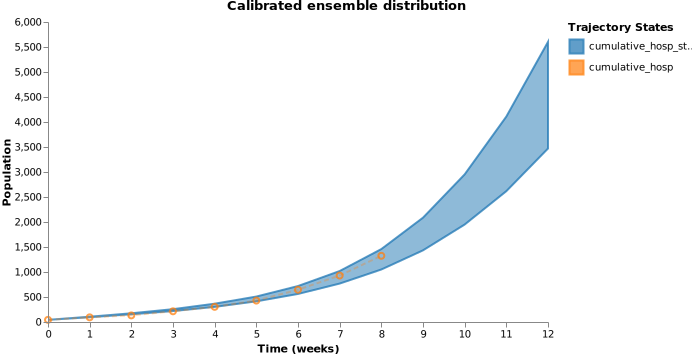

In [ ]:
data_mapping = {'cumulative_hosp': 'cumulative_hosp'}
calibrated_results = pyciemss.ensemble_calibrate(fl_models, solution_mappings, fl_data, data_mapping=data_mapping, num_iterations=num_iterations)
parameter_estimates = calibrated_results["inferred_parameters"]
# print(parameter_estimates())

calibrated_ensemble_result = pyciemss.ensemble_sample(fl_models, solution_mappings, end_time, logging_step_size, num_samples, 
                                                      start_time=start_time, inferred_parameters=parameter_estimates)
# display(calibrated_ensemble_result['data'].head())

# Plot the result
schema = plots.trajectories(calibrated_ensemble_result["data"], keep="cumulative_hosp_state", points=dataset.reset_index(drop=True), title=[f"Calibrated ensemble distribution"], axis_labels={"xaxis_label": "Time (weeks)", "yaxis_label": "Population"})
plots.save_schema(schema, "_schema.svg")
plots.ipy_display(schema, format='svg') 

# PENNSYLVANIA

## Calibrate each model independently

### Age-structured model

Data printout: This dataset contains 8 rows of data. The first column, Timestamp, begins at 0.0 and ends at 8.0. The subsequent columns are named: cumulative_hosp


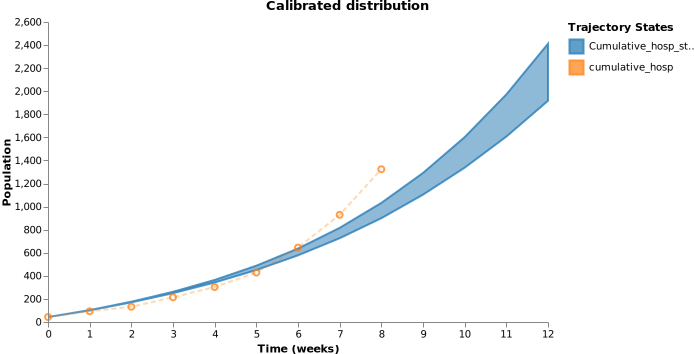

In [15]:
model = pa_models[1]
dataset = pd.read_csv(pa_data).drop(columns=['Timestamp']).reset_index(drop=True)
data_mapping = {"cumulative_hosp": "cumulative_hosp"}

num_iterations = 100
calibrated_results = pyciemss.calibrate(
    model, 
    pa_data, 
    data_mapping=data_mapping, 
    num_iterations=num_iterations
)
parameter_estimates = calibrated_results["inferred_parameters"]
# print(parameter_estimates())

calibrated_sample_results = pyciemss.sample(
    model, 
    end_time, 
    logging_step_size, 
    num_samples,             
    start_time=start_time, 
    inferred_parameters=parameter_estimates
)
# display(calibrated_sample_results["data"].head())

# Plot the result
schema = plots.trajectories(calibrated_sample_results["data"], keep="Cumulative_hosp_state", points=dataset.reset_index(drop=True), title=[f"Calibrated distribution"], axis_labels={"xaxis_label": "Time (weeks)", "yaxis_label": "Population"})
plots.save_schema(schema, "_schema.svg")
plots.ipy_display(schema, format='svg') 

### SEIRHD model

Data printout: This dataset contains 8 rows of data. The first column, Timestamp, begins at 0.0 and ends at 8.0. The subsequent columns are named: cumulative_hosp


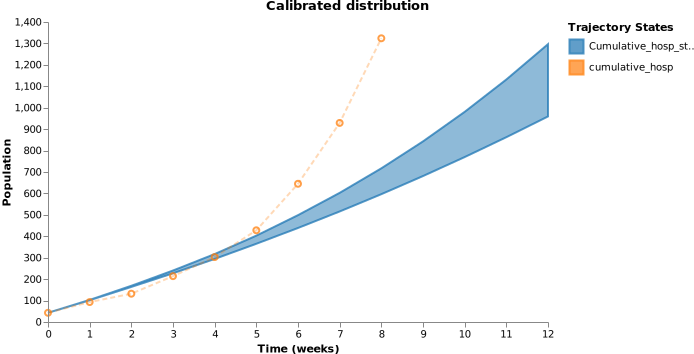

In [16]:
model = pa_models[1]
dataset = pd.read_csv(pa_data).drop(columns=['Timestamp']).reset_index(drop=True)
data_mapping = {"cumulative_hosp": "Cumulative_hosp"}

num_iterations = 100
calibrated_results = pyciemss.calibrate(
    model, 
    pa_data, 
    data_mapping=data_mapping, 
    num_iterations=num_iterations
)
parameter_estimates = calibrated_results["inferred_parameters"]
# print(parameter_estimates())

calibrated_sample_results = pyciemss.sample(
    model, 
    end_time, 
    logging_step_size, 
    num_samples,             
    start_time=start_time, 
    inferred_parameters=parameter_estimates
)
# display(calibrated_sample_results["data"].head())

# Plot the result
schema = plots.trajectories(calibrated_sample_results["data"], keep="Cumulative_hosp_state", points=dataset.reset_index(drop=True), title=[f"Calibrated distribution"], axis_labels={"xaxis_label": "Time (weeks)", "yaxis_label": "Population"})
plots.save_schema(schema, "_schema.svg")
plots.ipy_display(schema, format='svg') 

### Calibrate the ensemble model and plot the results

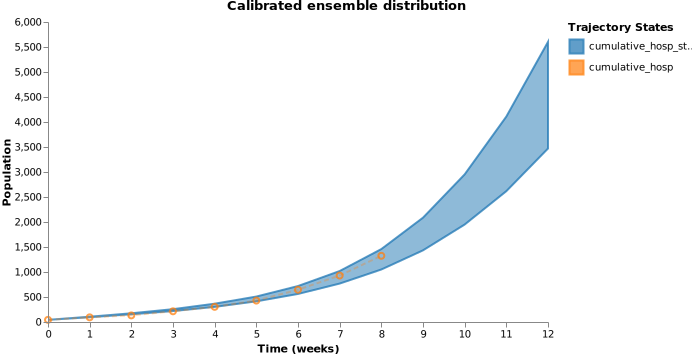

In [ ]:
data_mapping = {'cumulative_hosp': 'cumulative_hosp'}
calibrated_results = pyciemss.ensemble_calibrate(pa_models, solution_mappings, pa_data, data_mapping=data_mapping, num_iterations=num_iterations)
parameter_estimates = calibrated_results["inferred_parameters"]
# print(parameter_estimates())

calibrated_ensemble_result = pyciemss.ensemble_sample(pa_models, solution_mappings, end_time, logging_step_size, num_samples, 
                                                      start_time=start_time, inferred_parameters=parameter_estimates)
# display(calibrated_ensemble_result['data'].head())

# Plot the result
schema = plots.trajectories(calibrated_ensemble_result["data"], keep="cumulative_hosp_state", points=dataset.reset_index(drop=True), title=[f"Calibrated ensemble distribution"], axis_labels={"xaxis_label": "Time (weeks)", "yaxis_label": "Population"})
plots.save_schema(schema, "_schema.svg")
plots.ipy_display(schema, format='svg')